# Red Wine Data set Analyses CE888

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras import metrics
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
%matplotlib inline

print("Importing Libraries is Done!")

Using TensorFlow backend.


Importing Libraries is Done!


In [2]:
#Load red wine dataset
dataset2 = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Clustering Data\\red-wine-dataset\\wineQualityReds.csv")


# Preview the first 5 lines of the loaded data 
dataset2.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Id column is redundant and not useful, we want to drop it
dataset2.drop('Unnamed: 0', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# Preview the first 5 lines of the loaded data 
dataset2.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Compute Missing or Null Data points

In [6]:
dataset2.isnull().sum()
dataset2.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#check for missing variables
dataset2.isnull().any()

fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## Descriptive Statistics

In [8]:
#basic descriptive statistics
dataset2.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Skewness of a data set

In [9]:
dataset2.skew()

fixed.acidity           0.982751
volatile.acidity        0.671593
citric.acid             0.318337
residual.sugar          4.540655
chlorides               5.680347
free.sulfur.dioxide     1.250567
total.sulfur.dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

## Data Visualizations

In [10]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})

C:\Users\Antri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


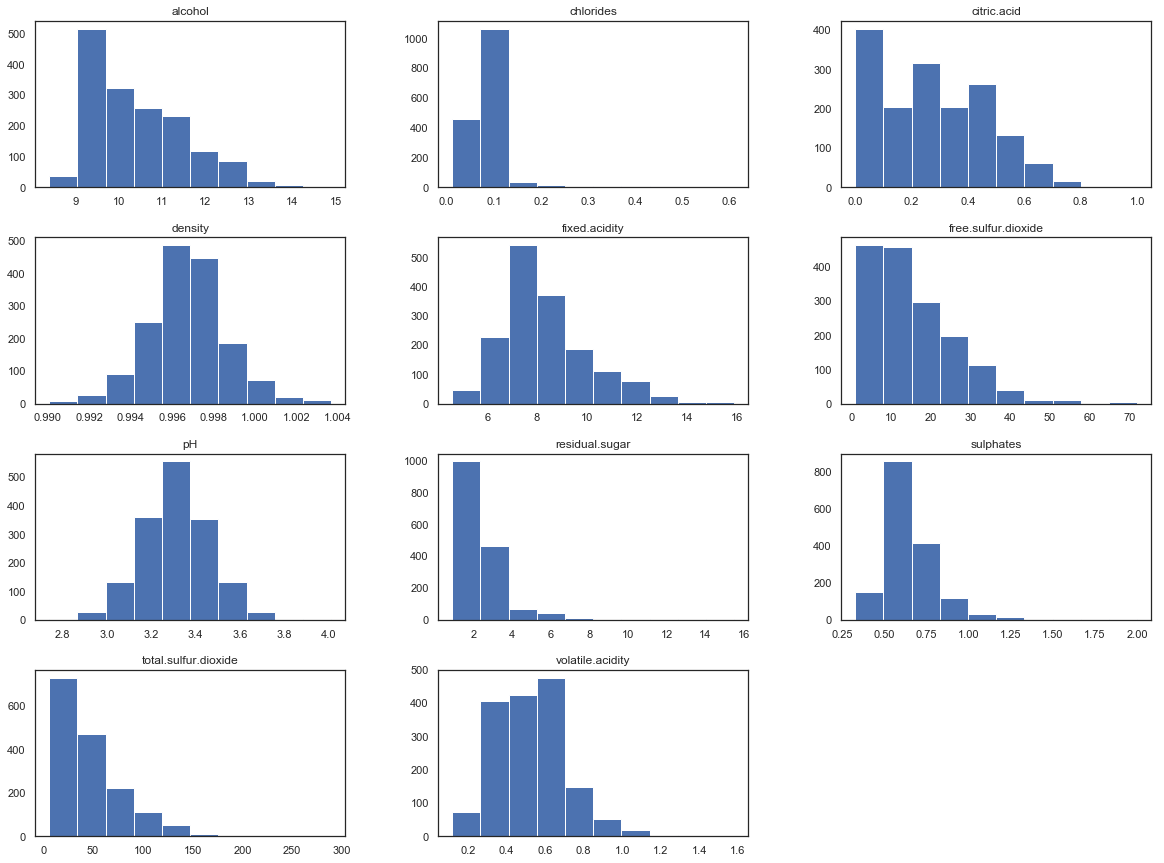

In [11]:
data_mean=dataset2.ix[:,0:11]

#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(20, 15),grid=False,)

## Visualize distribution of data via density plots

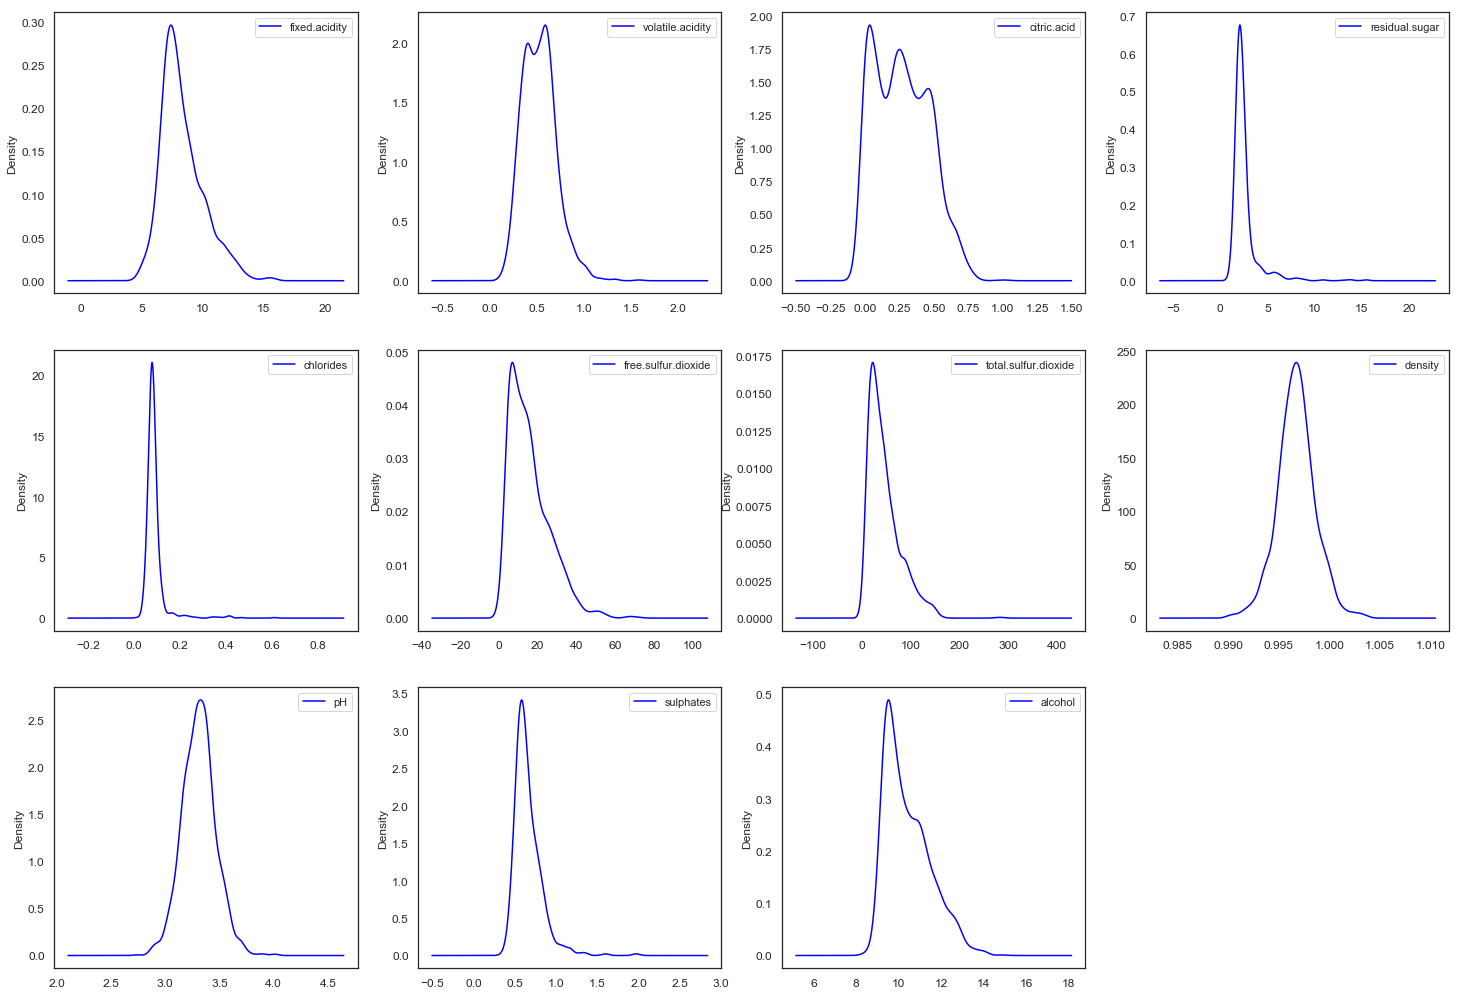

In [20]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(5,4), sharex=False, 
                     sharey=False,fontsize=12, figsize=(25,30),color='blue')

## Visualise distribution of data via box plots

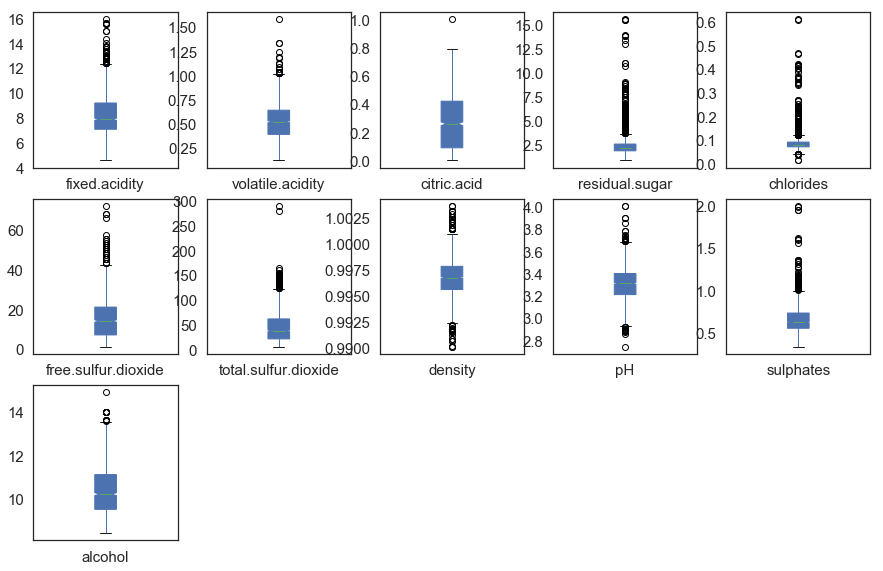

In [21]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(6,5), sharex=False, sharey=False,notch=True, fontsize=15, figsize=(15,20) , patch_artist=True)

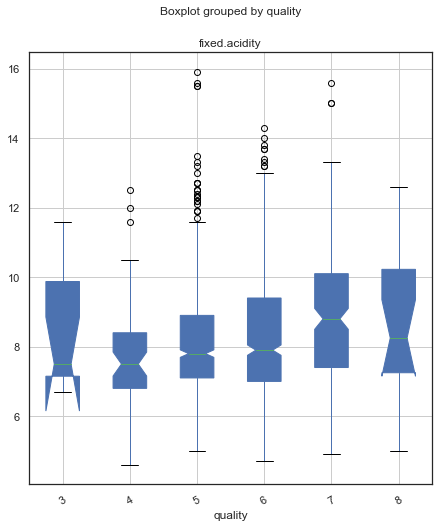

In [22]:
dataset2.boxplot('fixed.acidity','quality',rot = 30,figsize=(7,8),notch=True , patch_artist=True)


## Scater plots

In [ ]:
dataset2.boxplot('fixed.acidity','quality',rot = 30,figsize=(7,8),notch=True , patch_artist=True)

AttributeError: 'Series' object has no attribute 'show'

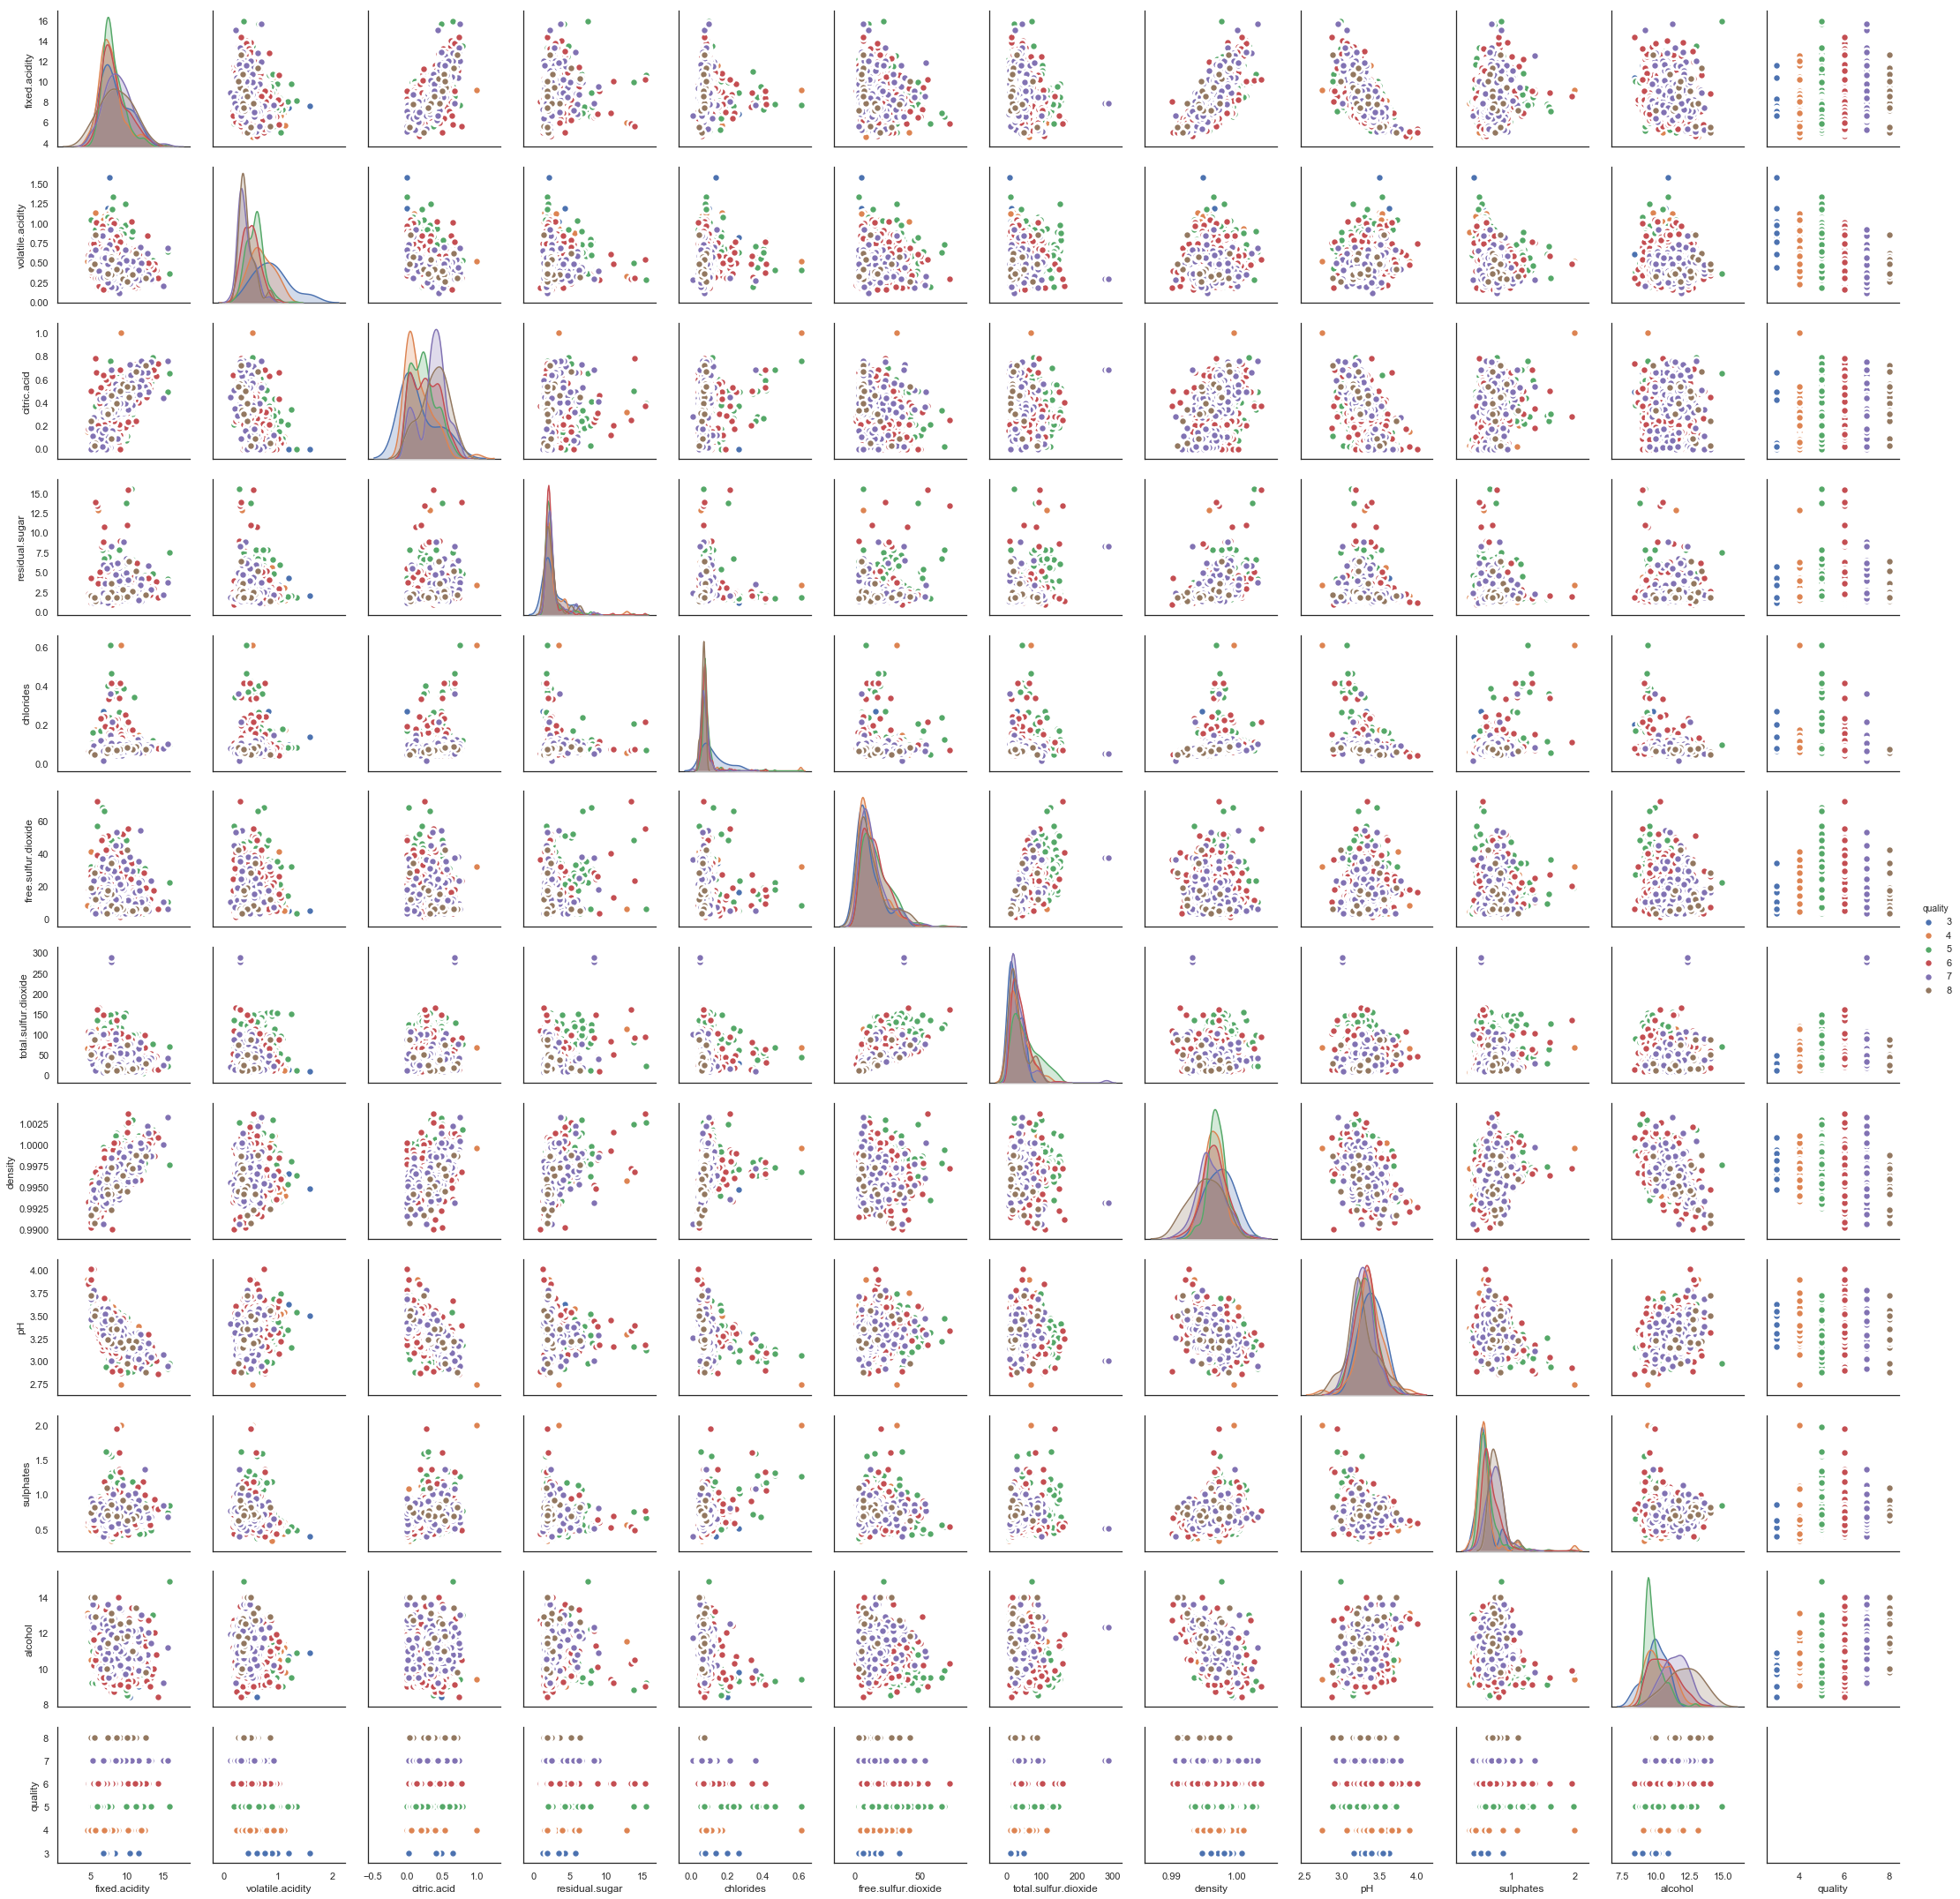

In [42]:
data = pd.read_csv("C:\\Users\\Antri\\Desktop\\First Semester\\CE888\\Clustering Data\\red-wine-dataset\\wineQualityReds.csv"
, index_col=False)

# Id column is redundant and not useful, we want to drop it
data.drop('Unnamed: 0', axis =1, inplace=True)
#data.drop('Unnamed: 0', axis=1, inplace=True)

sns.pairplot(data, kind="scatter", hue="quality", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Correlation Matrix

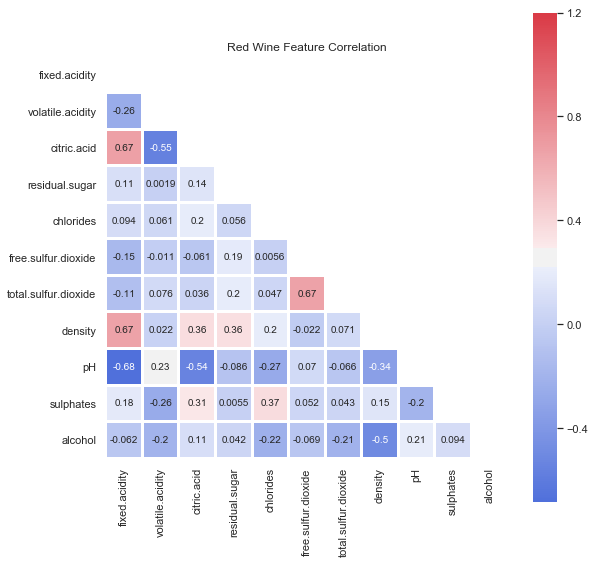

In [52]:
# plot correlation matrix
import matplotlib.pyplot as plt
plt.style.use('dark_background')
sns.set_style("white")


# Compute the correlation matrix
corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
dataset2, ax = plt.subplots(figsize=(9, 9))
plt.title('Red Wine Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

## K-means Clustering Algorithm

#### The code of K-means clustering algorithm is based on the following source:
https://www.datacamp.com/community/tutorials/k-means-clustering-python

##### Split the dataset into training and validation data set

In [97]:
#le = preprocessing.LabelEncoder()
#dataset2 = dataset2.apply(le.fit_transform)

#X = dataset2.values[:, 0:11]
#Y = dataset2.values[:,11]

#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.20, random_state = 100)

X = train.drop(['target'], axis = 1).values
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((959, 10), (320, 10), (959,), (320,))

### Build K-means algorithm

##### We use the elbow method to pick the optimum amount of clusters
The code of Elbow method is based on the following source:
https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

##### Find the most optimum k for clustering according to Accuracy score

In [99]:
from sklearn.cluster import KMeans
n=100
n_clusters = 9

kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
#Accuracy score
ac=accuracy_score(y,y_pred_kmeans)*100
print( "\nThe K Mean cluster accuracy score is:", ac*n)
plt.show()
print("Normalized mutual score is:",normalized_mutual_info_score(y, y_pred_kmeans))
print("Completeness score is:",completeness_score(y, y_pred_kmeans))



The K Mean cluster accuracy score is: 54.7302580140735
Normalized mutual score is: 0.012510293350571071
Completeness score is: 0.016474824330411614


C:\Users\Antri\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### Autoencoder with Softmax-layer

In [114]:
X = train.drop(['target'], axis = 1).values
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((959, 10), (320, 10), (959,), (320,))

In [115]:
#The autoencoder code is based on the following source:
#https://github.com/rjpg/bftensor/blob/349f0c3aad5e2768e94f4f7b741f5f7ff4328d64/Autoencoder/src/AutoEncoderMNIST.py
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np

num_train = 959
num_test = 320

height, width, depth = 1, 10, 1 # MNIST images are 1x63
num_classes = 10

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels


In [116]:

input_img = Input(shape=(height * width,))

x = Dense(height * width, activation='relu')(input_img)

encoded = Dense(height * width//2, activation='relu' ,activity_regularizer=regularizers.l1(10e-5))(x)
encoded = Dense(height * width//5, activation='relu')(encoded)

y = Dense(height * width, activation='relu')(x)

decoded = Dense(height * width//5, activation='relu')(y)
decoded = Dense(height * width//2, activation='relu')(decoded)

z = Dense(height * width, activation='sigmoid')(decoded)
model = Model(input_img, z)


model.compile(optimizer='adadelta', loss='mse') # reporting the accuracy

#Normalizing the data
from keras import regularizers
from sklearn import preprocessing
X_train = pd.DataFrame(X_train)#.values)
X_train = preprocessing.MinMaxScaler().fit_transform(X_train.values)


model.fit(X_train, X_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, X_test))



Train on 959 samples, validate on 320 samples
Epoch 1/10
959/959 [==============================] - 1s 1ms/step - loss: 0.2503 - val_loss: 0.2494
Epoch 2/10
959/959 [==============================] - 0s 27us/step - loss: 0.2432 - val_loss: 0.2495
Epoch 3/10
959/959 [==============================] - 0s 21us/step - loss: 0.2376 - val_loss: 0.2494
Epoch 4/10
959/959 [==============================] - 0s 24us/step - loss: 0.2319 - val_loss: 0.2494
Epoch 5/10
959/959 [==============================] - 0s 24us/step - loss: 0.2258 - val_loss: 0.2493
Epoch 6/10
959/959 [==============================] - 0s 20us/step - loss: 0.2187 - val_loss: 0.2490
Epoch 7/10
959/959 [==============================] - 0s 21us/step - loss: 0.2102 - val_loss: 0.2484
Epoch 8/10
959/959 [==============================] - 0s 20us/step - loss: 0.2001 - val_loss: 0.2474
Epoch 9/10
959/959 [==============================] - 0s 23us/step - loss: 0.1880 - val_loss: 0.2463
Epoch 10/10
959/959 [=========================

In [117]:
mid = Model(input_img, y)
#reduced_representation =mid.predict(X_test)
x =mid.predict(X_test)

In [118]:
n=100
out = Dense(num_classes, activation='softmax')(y)
reduced = Model(input_img, out)
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

reduced.fit(X_train, Y_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, Y_test))

scores = reduced.evaluate(X_test, Y_test, verbose=1) 

Train on 959 samples, validate on 320 samples
Epoch 1/10
959/959 [==============================] - 1s 987us/step - loss: 3.0840 - acc: 0.0000e+00 - val_loss: 2.3033 - val_acc: 0.0000e+00
Epoch 2/10
959/959 [==============================] - 0s 27us/step - loss: 2.8648 - acc: 0.0000e+00 - val_loss: 2.2856 - val_acc: 0.0000e+00
Epoch 3/10
959/959 [==============================] - 0s 23us/step - loss: 2.6823 - acc: 0.0000e+00 - val_loss: 2.2714 - val_acc: 0.3875
Epoch 4/10
959/959 [==============================] - 0s 25us/step - loss: 2.5563 - acc: 0.0000e+00 - val_loss: 2.2588 - val_acc: 0.3875
Epoch 5/10
959/959 [==============================] - 0s 20us/step - loss: 2.4575 - acc: 0.0000e+00 - val_loss: 2.2469 - val_acc: 0.3875
Epoch 6/10
959/959 [==============================] - 0s 26us/step - loss: 2.3725 - acc: 0.0000e+00 - val_loss: 2.2362 - val_acc: 0.3875
Epoch 7/10
959/959 [==============================] - 0s 22us/step - loss: 2.2983 - acc: 0.0000e+00 - val_loss: 2.2257 - va

In [120]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

#kmeans = KMeans(n_clusters=2, n_init=10, n_jobs=4)
kmeans = KMeans(n_clusters=9, init ='k-means++', max_iter = 300, n_init = 20, random_state = 0)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
ac=accuracy_score(y,y_pred_kmeans)*100
#Accuracy score
print( "\nThe K Mean cluster accuracy score using autoencoder is:", ac*n)
print("Normalized mutual score is:",normalized_mutual_info_score(y, y_pred_kmeans))
print("Completeness score is:",completeness_score(y, y_pred_kmeans))



The K Mean cluster accuracy score using autoencoder is: 46.91164972634871
Normalized mutual score is: 0.010826563173538075
Completeness score is: 0.01425751750081875


C:\Users\Antri\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
